# Data Preparation - Preprocessing

**University of San Diego, M.S. Applied Data Science**

Lai Leng Chan, Minsu Kim, Christopher Garcia

This notebook contains.....

In [2]:
# Import Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


# Preprocessing Packages
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Check current directory
os.getcwd()

'/Users/christophergarcia/Documents/GitHub/MSADS-Capstone-CryptoCurrencyFraudDetection/Code Library'

### Introduction

This data is extracted from the data folder, which was loaded from the Kaggle website. The data contains 9,841 rows and 51 columns. The preprocessing stage is commenced by reviewing each of the column types, as well as checking for null values within each column.

In [3]:
# Read in dataset
df = pd.read_csv('/Users/christophergarcia/Documents/GitHub/MSADS-Capstone-CryptoCurrencyFraudDetection/Data/transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [13]:
df.shape

(9841, 51)

In [3]:
# Feature names
df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [11]:
# Display DataFrame information including all columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [4]:
# Check for missing values
df.isna().sum()

Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent            

In [12]:
# Find percentage of missing values
round(df.isnull().sum()/len(df) * 100, 2)

Unnamed: 0                                               0.00
Index                                                    0.00
Address                                                  0.00
FLAG                                                     0.00
Avg min between sent tnx                                 0.00
Avg min between received tnx                             0.00
Time Diff between first and last (Mins)                  0.00
Sent tnx                                                 0.00
Received Tnx                                             0.00
Number of Created Contracts                              0.00
Unique Received From Addresses                           0.00
Unique Sent To Addresses                                 0.00
min value received                                       0.00
max value received                                       0.00
avg val received                                         0.00
min val sent                                             0.00
max val 

In [8]:
# Replace with mode
df[' ERC20 most sent token type'].value_counts()

 ERC20 most sent token type
0                                                         4399
                                                          1191
EOS                                                        138
OmiseGO                                                    137
Golem                                                      130
                                                          ... 
BlockchainPoland                                             1
Covalent Token                                               1
Nebula AI Token                                              1
Blocktix                                                     1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: count, Length: 304, dtype: int64

In [10]:
# Replace with mode
df[' ERC20_most_rec_token_type'].value_counts()

 ERC20_most_rec_token_type
0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name: count, Length: 466, dtype: int64

For instance the most sent token type features, contains 27.41 percent of its rows to be missing values. There are also many other features such as avg val sent contract, and avg time between contract tnx that only have 8 percent of missing rows. Inspecting why these values are missing is critical to the performance of a predictive model. In this case, since 8 percent is not a huge loss, removing or replacing those values would allow for the model to work properly. Since there is a feature with 27 percent of missing values, the best strategy is to replace those values based on the values of that feature. Therefore, to mitigate for missing values, imputation using the mean will be utilized. 

### Dealing with Missing Values

In [28]:
# Drop rows with missing values
df = df.dropna(axis=1)
df.isnull().sum()

Unnamed: 0                                              0
Index                                                   0
Address                                                 0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent  

## Feature Engineering

### Run a random forest for feature selection

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into two separate features
X = df.drop(columns=['FLAG', 'Address']) # 'Address', ' ERC20 most sent token type', ' ERC20_most_rec_token_type'
y = df['FLAG']

# Instantiate Random Forest model
rfm = RandomForestClassifier(n_estimators=100)  

# Train the model on the data
rfm.fit(X, y)


RandomForestClassifier()

In [35]:
# Get feature importances from the trained model
feature_importances = rfm.feature_importances_

# Create a DataFrame to store feature importances along with their corresponding column names
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features based on importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


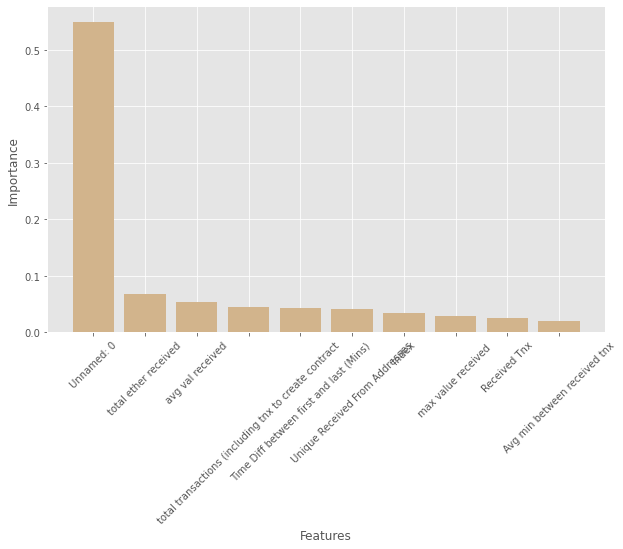

In [41]:
# Displays the top 10 features
k = 10 

# Select the top 'k' features
top_features = feature_importances_df.head(k)

plt.figure(figsize=(10, 6))
plt.bar(top_features['Feature'], top_features['Importance'], color='tan')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
#plt.title(f'Top {k} Features')
plt.show()


### Class Imbalance Strategy

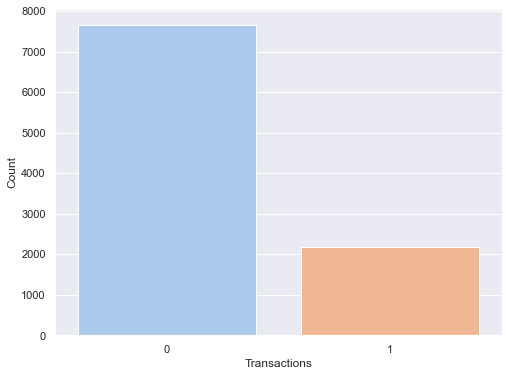

In [5]:
# Inspect class imbalance
sns.set(style='darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG', data=df, palette='pastel')
#plt.title('Class Distribution (Fraudulent Vs Non-Fraudulent)')
plt.xlabel('Transactions')
plt.ylabel('Count')
plt.show()

### Standardize, ont hot, etc.... Strategy

## Train-Test Split

### Cross validation

In [42]:
# Create training and testing datasets
# Save to data folder for modeling